In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("C:/Users/Rhayven/Downloads/new_dataset_fin.csv")

In [3]:
df.head

<bound method NDFrame.head of               Timestamp  \
0   23/01/2024 20:47:59   
1   23/01/2024 20:47:59   
2   22/01/2024 15:15:09   
3   22/01/2024 15:11:10   
4   21/01/2024 14:07:01   
..                  ...   
95  24/01/2024 12:09:21   
96  22/01/2024 15:12:32   
97  23/01/2024 18:36:49   
98  22/01/2024 15:15:09   
99  21/01/2024 14:06:25   

   I have read and understood the purpose of the survey and voluntarily agree to participate and consent. I acknowledge that the information I provide will be kept confidential and will solely be used for research purposes.    \
0                                       Yes, I agree.                                                                                                                                                                               
1                                       Yes, I agree.                                                                                                                                      

## Weather Adjustments and Inconvenience Perception

In [4]:
weather_adjustments = df['Do you often find yourself commuting earlier than needed to avoid extreme weather?']
inconvenience_perception = df['Would you consider it inconvenient to adjust your commute schedule to avoid hot weather conditions?']

In [5]:
contingency_table = pd.crosstab(weather_adjustments, inconvenience_perception)

# Perform chi-square test for independence
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

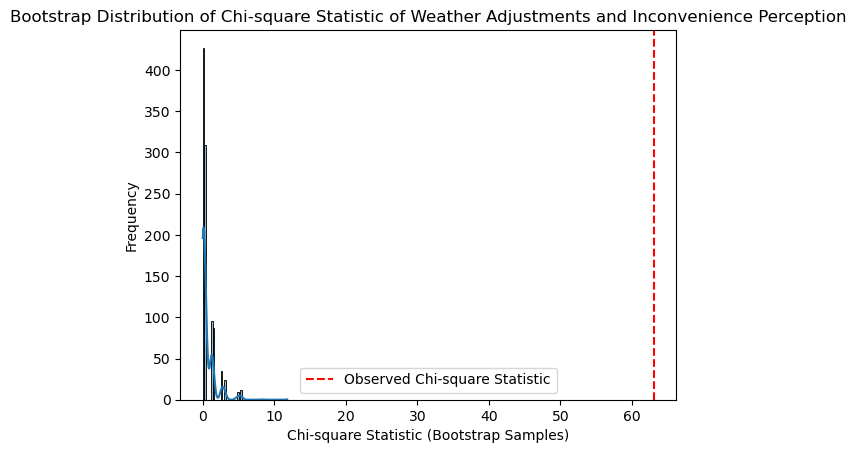

In [6]:
#Bootstrapping 
bootstrap_samples = 1000
bootstrap_results = []
for _ in range(bootstrap_samples):
    shuffled_inconvenience_perception = np.random.permutation(inconvenience_perception)
    shuffled_contingency_table = pd.crosstab(weather_adjustments, shuffled_inconvenience_perception)
    chi2_stat_bootstrap, _, _, _ = chi2_contingency(shuffled_contingency_table)
    bootstrap_results.append(chi2_stat_bootstrap)

sns.histplot(bootstrap_results, kde=True)
plt.xlabel('Chi-square Statistic (Bootstrap Samples)')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Chi-square Statistic of Weather Adjustments and Inconvenience Perception')
plt.axvline(x=chi2_stat, color='red', linestyle='--', label='Observed Chi-square Statistic')
plt.legend()

In [7]:
#Chi-Square 
weather_adjustments = df['Do you often find yourself commuting earlier than needed to avoid extreme weather?']
inconvenience_perception = df['Would you consider it inconvenient to adjust your commute schedule to avoid hot weather conditions?']

In [8]:
contingency_table = pd.crosstab(weather_adjustments, inconvenience_perception)

chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-square test results - chi2-statistic: {chi2_stat}, p-value: {p_value}')

if p_value < 0.05:
    print("The p-value is less than 0.05, suggesting a statistically significant association.")
else:
    print("The p-value is greater than or equal to 0.05, indicating no significant association.")

Chi-square test results - chi2-statistic: 63.04223744292237, p-value: 2.0232116466091123e-15
The p-value is less than 0.05, suggesting a statistically significant association.


The Chi-square test yieldedresults with a chi-square statistic of 63.04 and an p-value of 2.02e-15. This statistical analysis provides strong evidence indicating a significant association between Weather Adjustment and Inconvenience Perception. The p-value being less than 0.05 underscores the statistical significance of the observed relationship.The statistically significant association between Weather Adjustment and Inconvenience Perception implies that commuters' decisions to adjust their schedules due to weather are not random but are indeed correlated with their perception of inconvenience.

Individuals who adjust their schedule due to weather and perceive it as less inconvenient tend to exhibit a higher frequency of such adjustments. Conversely, those who find weather-adjusted scheduling more inconvenient may opt for less frequent modifications. This insight reinforces the understanding that commuters adapt their schedules based on their perception of inconvenience when facing varying weather conditions. The Chi-square test results a connection between Weather Adjustment and Inconvenience Perception. Commuters who adjust their schedules due to weather and find it less inconvenient demonstrate a higher frequency of such adjustments.

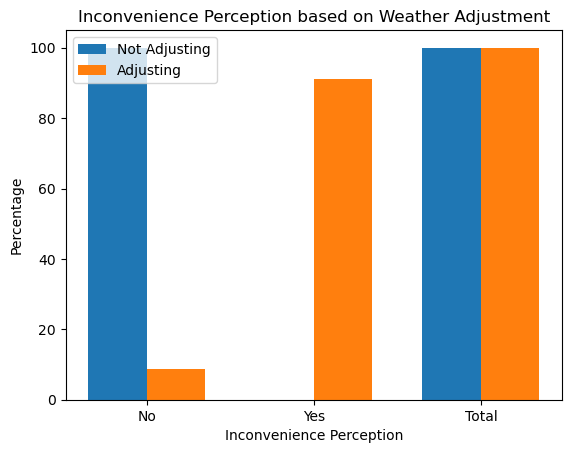

In [26]:
contingency_table = pd.crosstab(weather_adjustment, inconvenience_perception, margins=True, margins_name="Total")

percentage_table = contingency_table.div(contingency_table["Total"], axis=0) * 100

fig, ax = plt.subplots()
bar_width = 0.35

r1 = range(len(percentage_table.columns))
r2 = [x + bar_width for x in r1]

# Plotting
plt.bar(r1, percentage_table.loc['No'], width=bar_width, label='Not Adjusting')
plt.bar(r2, percentage_table.loc['Yes'], width=bar_width, label='Adjusting')

plt.xlabel('Inconvenience Perception')
plt.ylabel('Percentage')
plt.title('Inconvenience Perception based on Weather Adjustment')

plt.legend()

plt.xticks([r + bar_width / 2 for r in range(len(percentage_table.columns))], percentage_table.columns)

plt.show()


## Commute Efficiency and Time of Day Preference

In [17]:
df = pd.read_csv("C:/Users/Rhayven/Downloads/new_dataset_fin.csv")

efficient_commute=df['Are you interested in identifying the most efficient commute time that enables you to reduce perspiration and avoid prolonged waiting before your class begins?']
time_of_day_preference=df['What time of day do you prefer to commute during the summer?']

In [20]:
contingency_table = pd.crosstab(efficient_commute, time_of_day_preference)

#Chi-Square test for Independence
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

In [22]:

observed_contingency_table = pd.crosstab(efficient_commute, time_of_day_preference)

bootstrap_samples = 1000
bootstrap_results = []

for _ in range(bootstrap_samples):
    shuffled_time_of_day_preference = np.random.permutation(time_of_day_preference)
    shuffled_contingency_table = pd.crosstab(efficient_commute, shuffled_time_of_day_preference)
    chi2_stat_bootstrap, _, _, _ = chi2_contingency(shuffled_contingency_table)
    bootstrap_results.append(chi2_stat_bootstrap)

# Display the results
print(f'Chi-square test results - chi2-statistic: {chi2_stat}, p-value: {p_value}')

if p_value < 0.05:
    print("The p-value is less than 0.05, suggesting a statistically significant association.")
else:
    print("The p-value is greater than or equal to 0.05, indicating no significant association.")


Chi-square test results - chi2-statistic: 23.983134920634917, p-value: 2.5183319337396593e-05
The p-value is less than 0.05, suggesting a statistically significant association.


The Chi-square test results, a chi-square statistic of 23.98 and a p-value of 2.52e-05, establish a connection between commuters' interest in identifying the most efficient commute time and their preferences for commuting during the summer. This statistical significance strongly indicates that the choice of commuting time is intricately tied to commuters' aspirations for an optimized commute.

The analysis reveals that individuals interested in an efficient commute may exhibit certain time-of-day preferences, potentially aligning with their efforts to reduce perspiration and minimize waiting time. This implies that commuters who value efficiency may tailor their commute schedules based on their time-of-day preferences, providing insights into how commuters adapt to optimize their commuting experience.

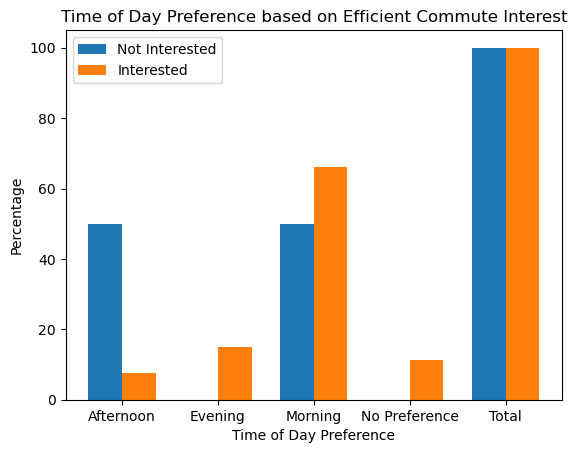

In [34]:
contingency_table = pd.crosstab(efficient_commute, time_of_day_preference, margins=True, margins_name="Total")

percentage_table = contingency_table.div(contingency_table["Total"], axis=0) * 100
fig, ax = plt.subplots()

bar_width = 0.35

r1 = range(len(percentage_table.columns))
r2 = [x + bar_width for x in r1]

# Plotting
plt.bar(r1, percentage_table.loc['No'], width=bar_width, label='Not Interested')
plt.bar(r2, percentage_table.loc['Yes'], width=bar_width, label='Interested')
plt.xlabel('Time of Day Preference')
plt.ylabel('Percentage')
plt.title('Time of Day Preference based on Efficient Commute Interest')
plt.legend()
plt.xticks([r + bar_width / 2 for r in range(len(percentage_table.columns))], percentage_table.columns)
plt.show()
